In [1]:
import os,sys
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sb
# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
# or u can use
# sys.path.append(os.path.abspath('..'))
from scripts.dataCleaning import *
from scripts.utils import *
# ignore warrnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('../data/MachineLearningRating_v3.txt',delimiter='|')
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
df.shape

(1000098, 52)

In [4]:
# get summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [5]:
# Data cleaning...
# Drop unnecessary columns
columns_to_drop = ['NumberOfVehiclesInFleet']
df = drop_unnecessary_columns(df, columns_to_drop)


In [6]:
# Convert columns to datetime
datetime_columns = ['TransactionMonth', 'VehicleIntroDate']
df = convert_to_datetime(df, datetime_columns)

In [7]:
# Fill missing values in numerical columns
numerical_columns = ['CustomValueEstimate','Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors','mmcode','VehicleIntroDate']
df = fill_missing_numerical(df, numerical_columns, strategy='median')


In [8]:
# Fill missing values in categorical columns
categorical_columns = ['Bank', 'AccountType', 'MaritalStatus', 'Gender','CrossBorder','VehicleType','NewVehicle','WrittenOff','Rebuilt','Converted','make','bodytype','Model','SumInsured']    
df = fill_missing_categorical(df, categorical_columns)


In [9]:
# check cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 51 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      1000098 non-null  object        
 9   AccountType               1000098 non-null  object        
 10  MaritalStatus             1000098 non-null  object        
 11  Gender                    1000098 non-null  object

In [10]:
# Data Summarization
summarize_data(df)


Descriptive Statistics:
         UnderwrittenCoverID      PolicyID               TransactionMonth  \
count          1.000098e+06  1.000098e+06                        1000098   
unique                  NaN           NaN                            NaN   
top                     NaN           NaN                            NaN   
freq                    NaN           NaN                            NaN   
mean           1.048175e+05  7.956682e+03  2015-02-28 10:49:29.147423744   
min            1.000000e+00  1.400000e+01            2013-10-01 00:00:00   
25%            5.514300e+04  4.500000e+03            2015-01-01 00:00:00   
50%            9.408300e+04  7.071000e+03            2015-04-01 00:00:00   
75%            1.391900e+05  1.107700e+04            2015-06-01 00:00:00   
max            3.011750e+05  2.324600e+04            2015-08-01 00:00:00   
std            6.329371e+04  5.290039e+03                            NaN   

       IsVATRegistered Citizenship   LegalType    Title Langua

In [11]:
# Data Quality Assessment
assess_data_quality(df)

Missing Values:
 UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding     

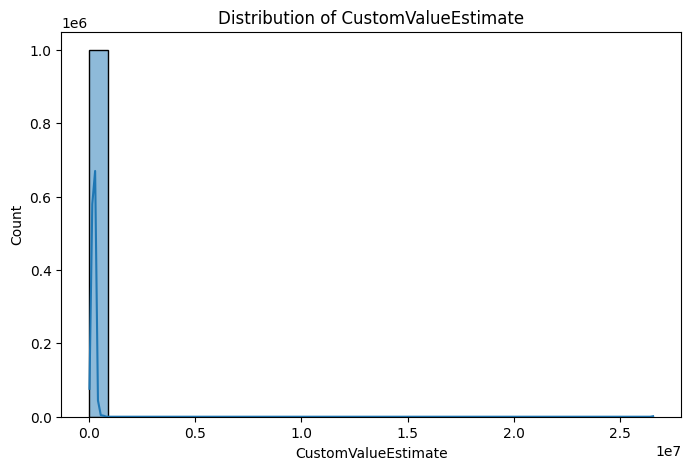

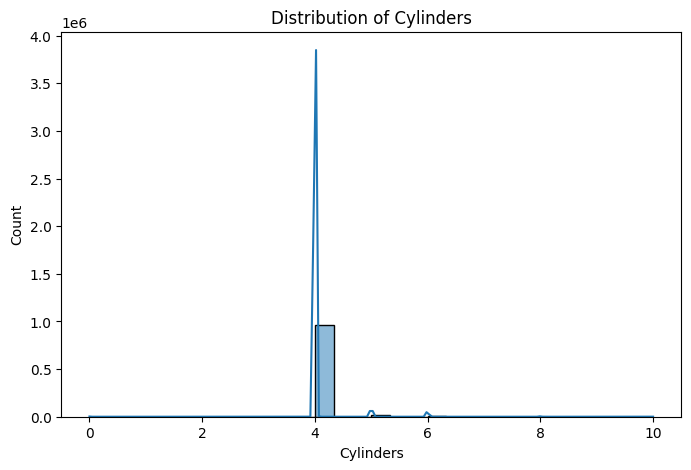

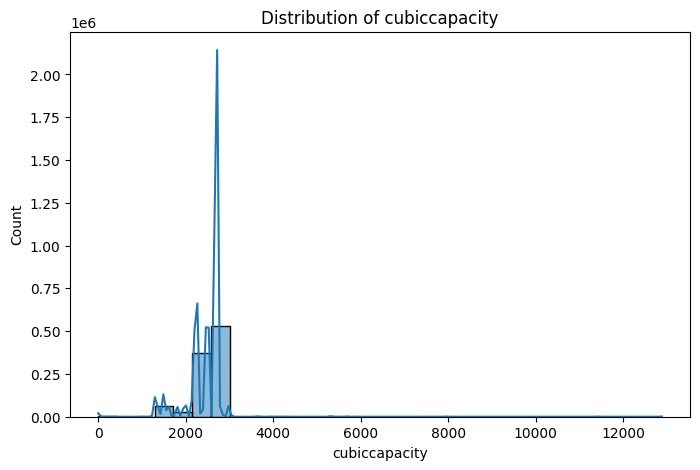

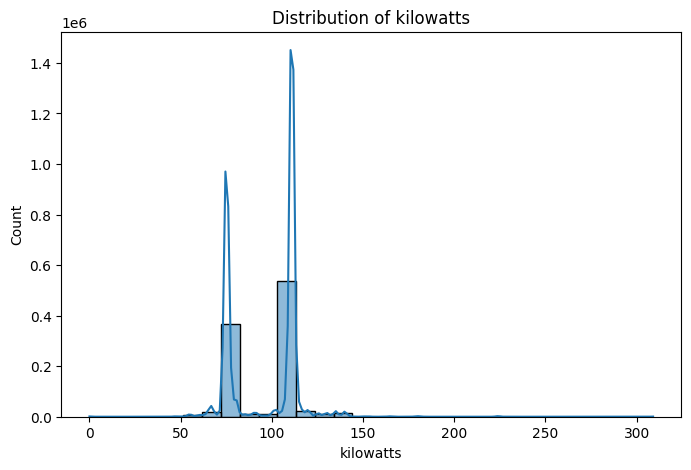

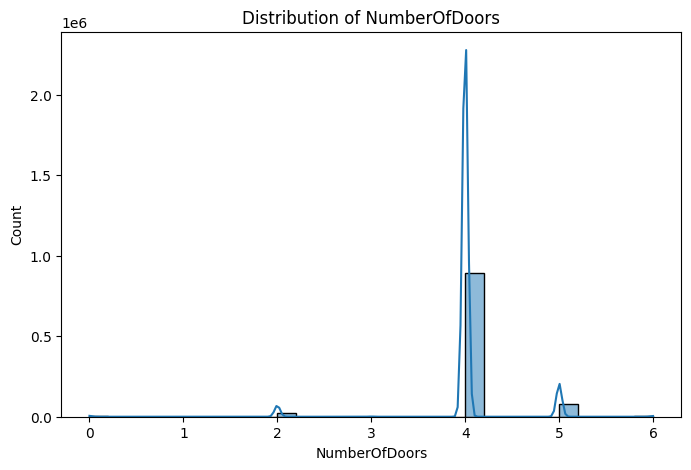

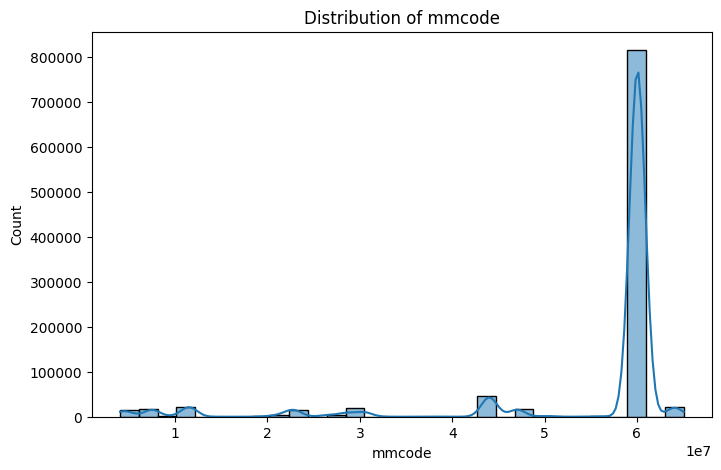

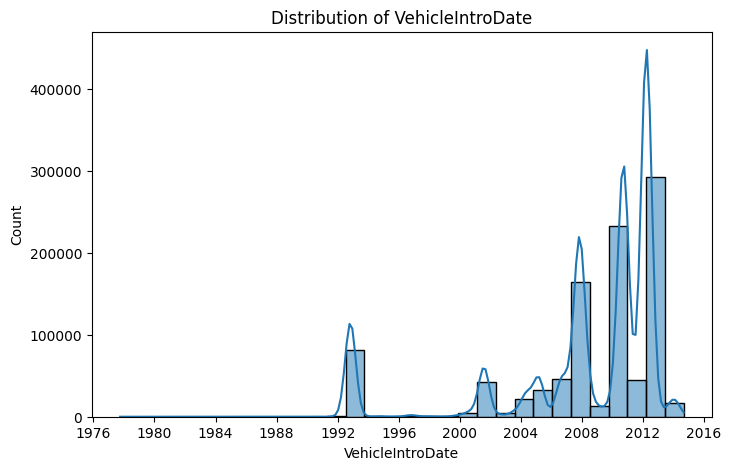

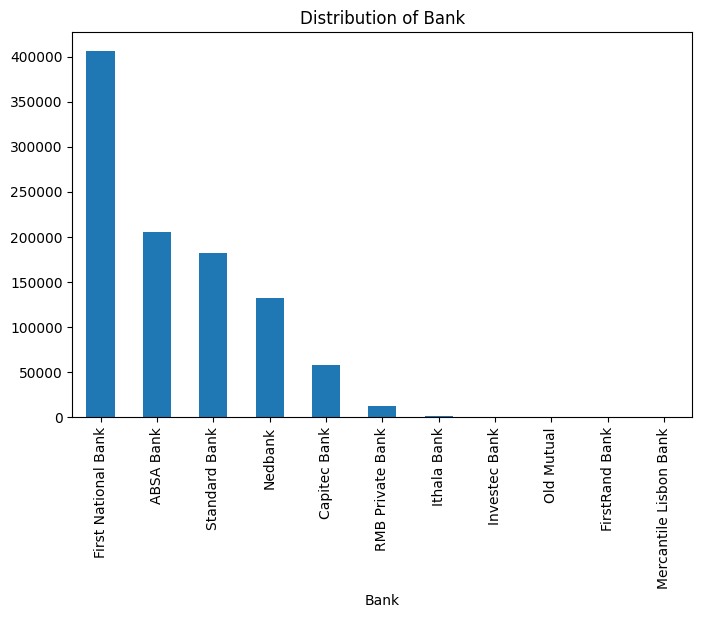

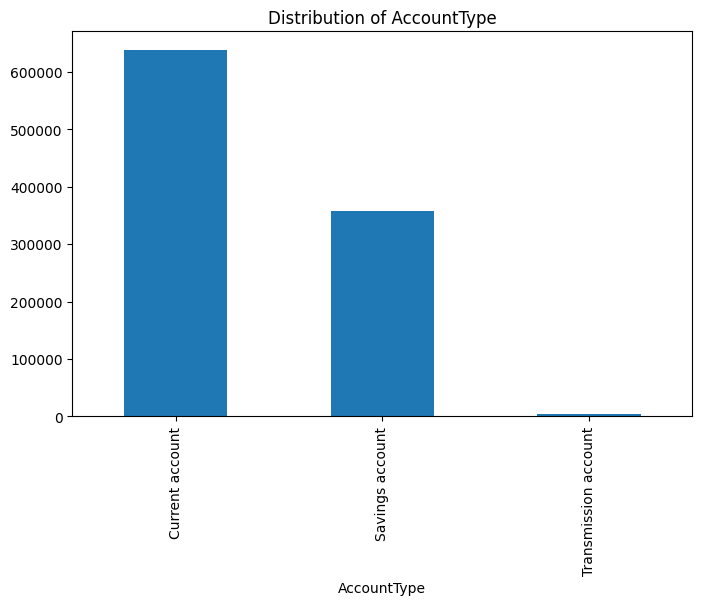

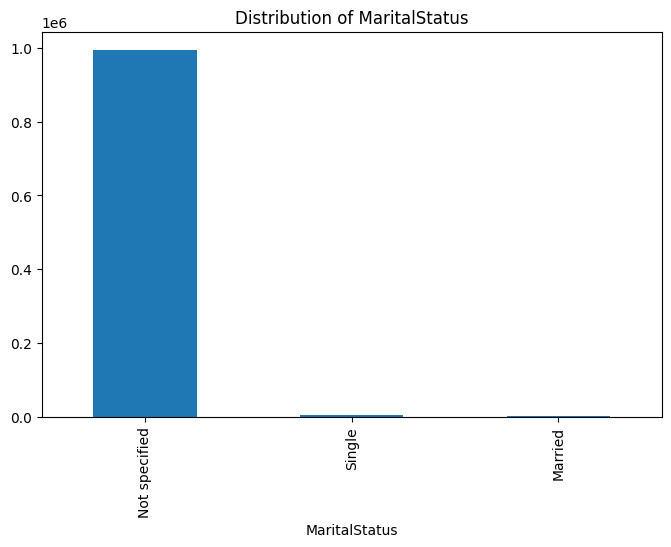

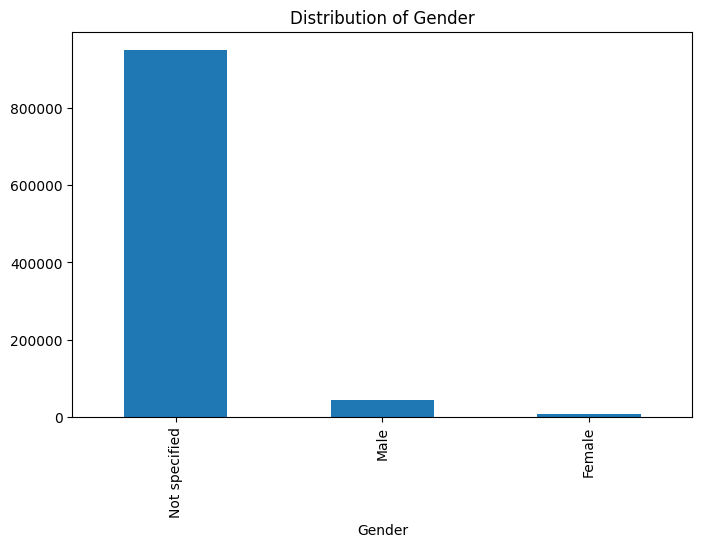

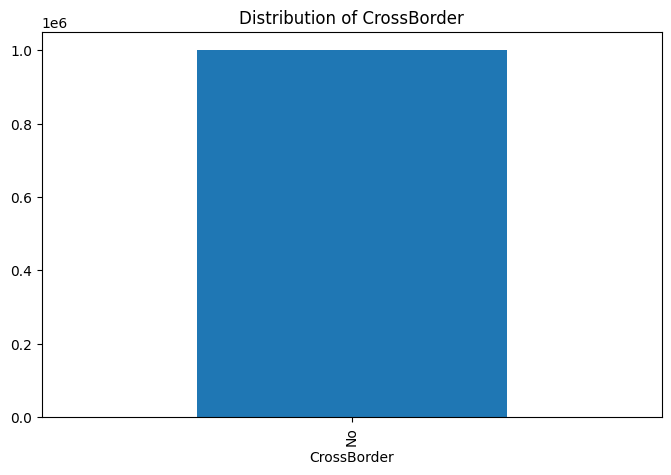

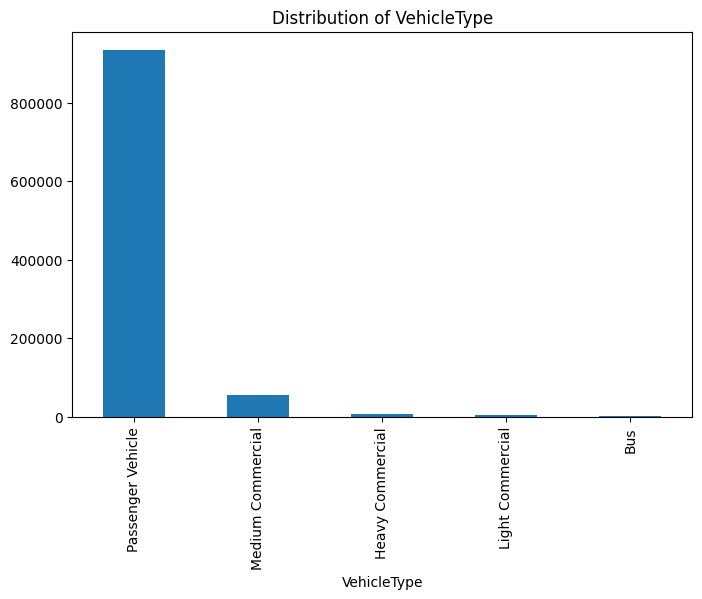

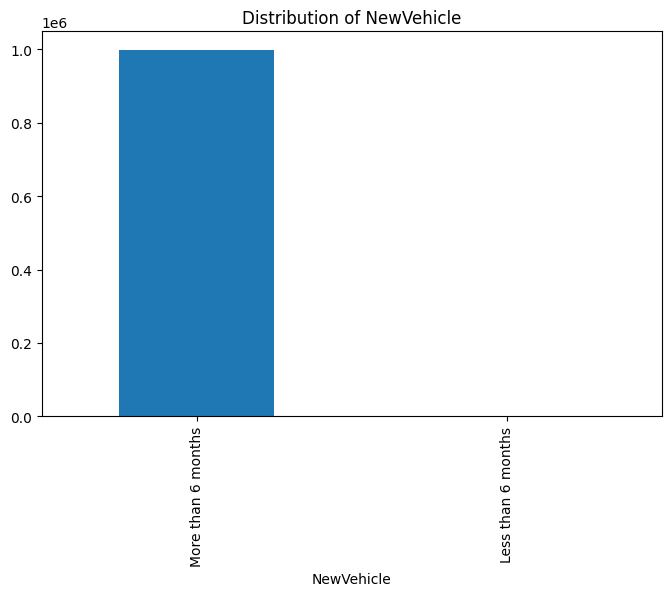

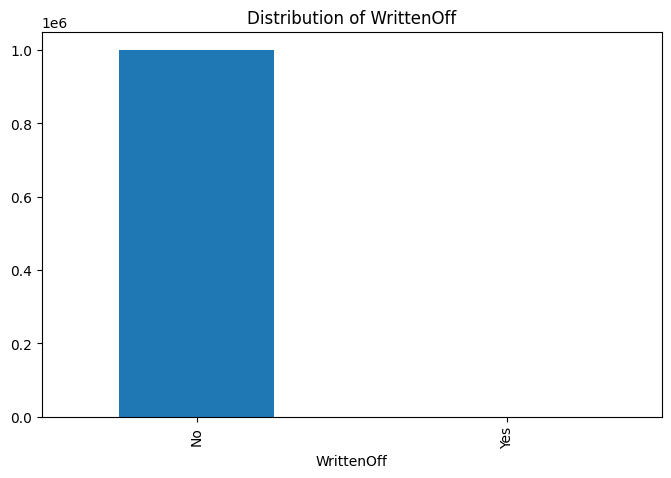

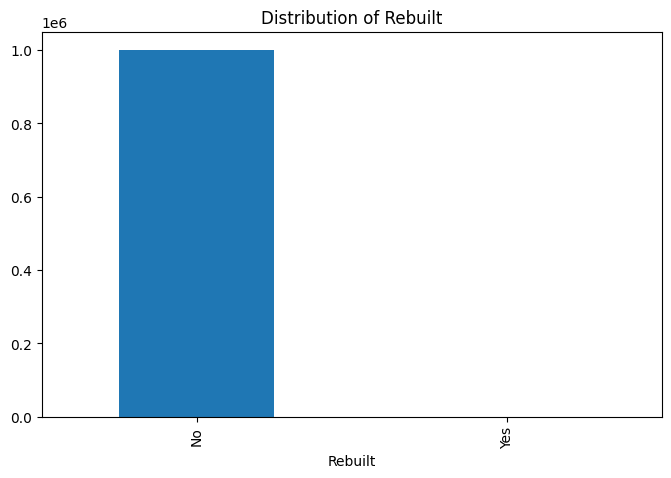

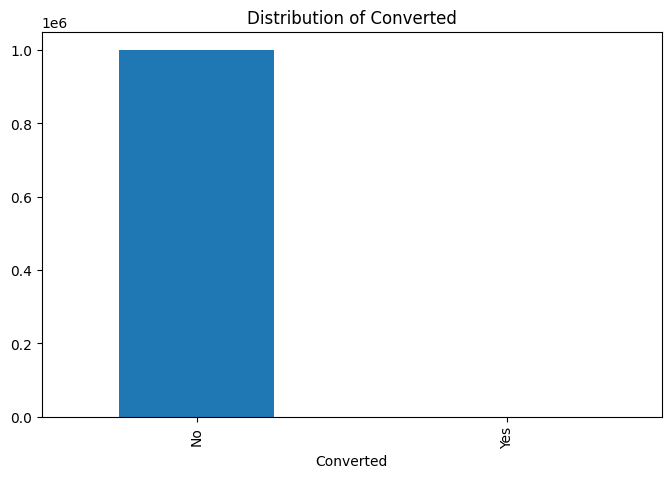

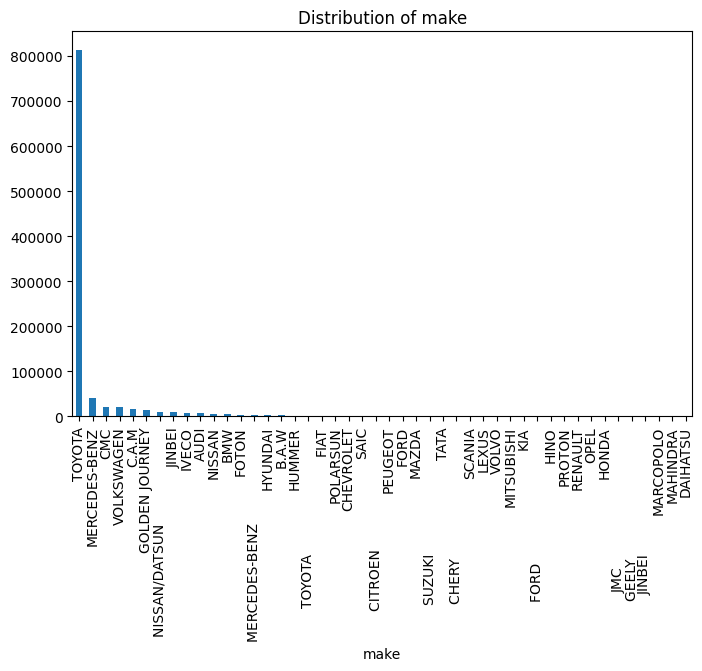

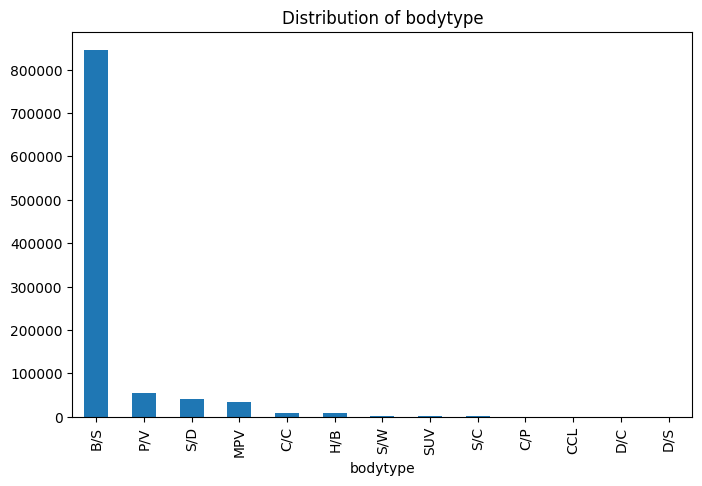

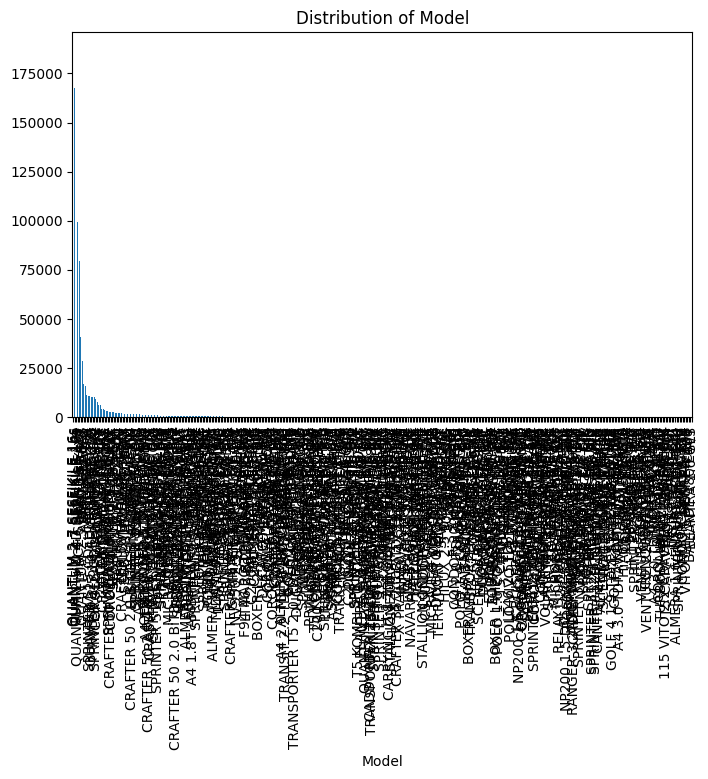

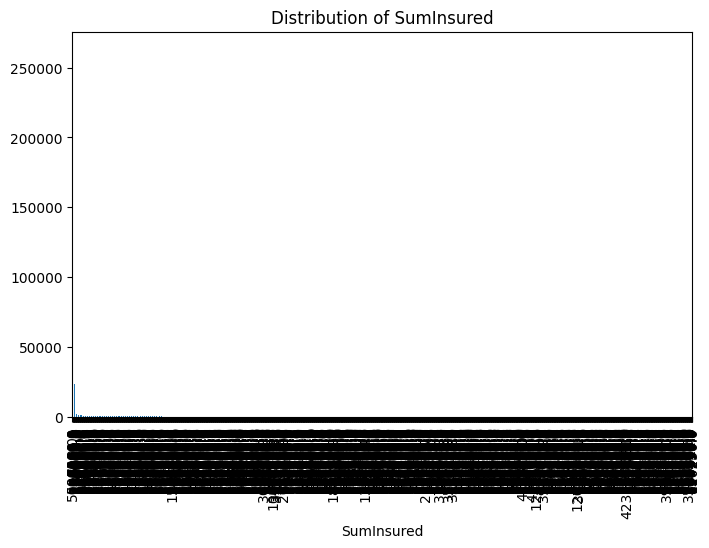

In [12]:

# Univariate Analysis
plot_univariate_distributions(df, numerical_columns, categorical_columns)


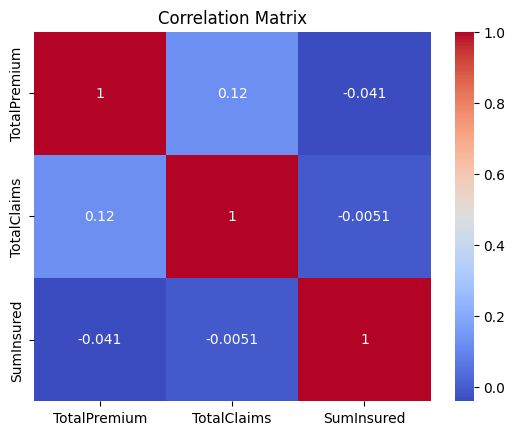

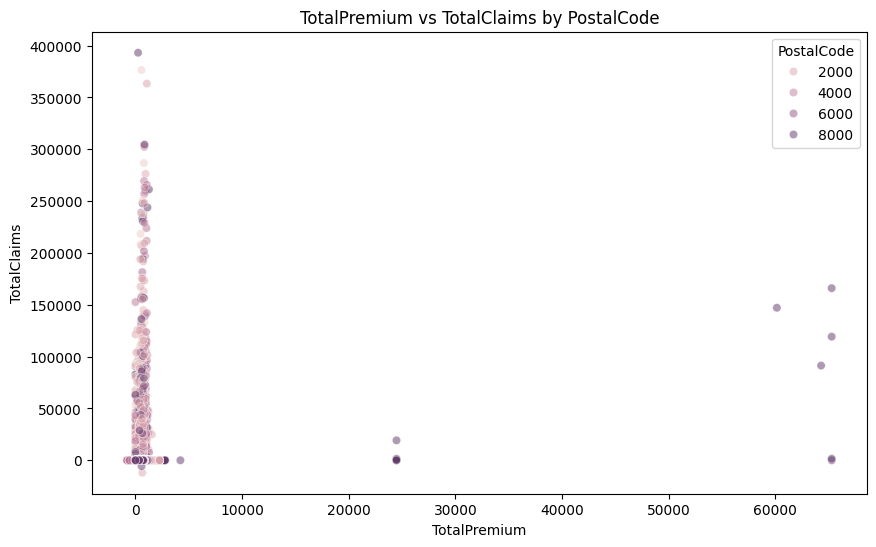

In [13]:
# Bivariate Analysis
analyze_correlations(df, ['TotalPremium', 'TotalClaims', 'SumInsured'])
plot_bivariate_relationships(df, 'TotalPremium', 'TotalClaims', 'PostalCode')

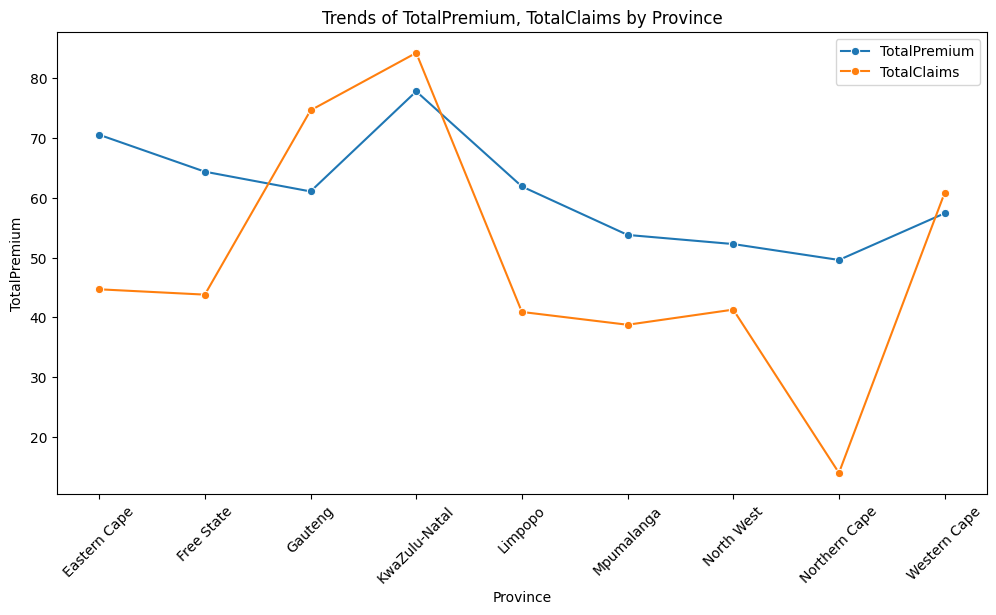

In [14]:
# Compare Trends
compare_geographical_trends(df, 'Province', ['TotalPremium', 'TotalClaims'])

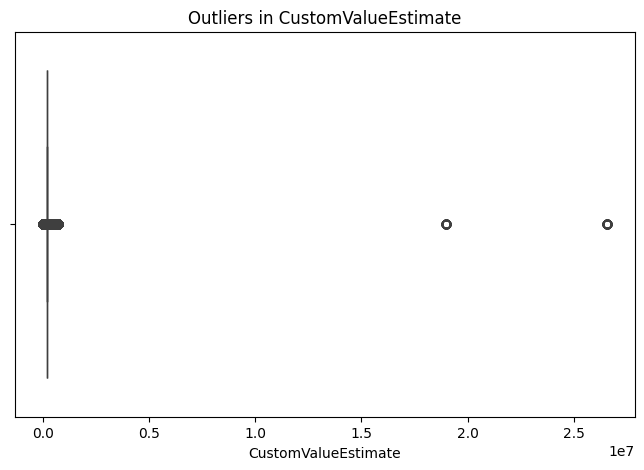

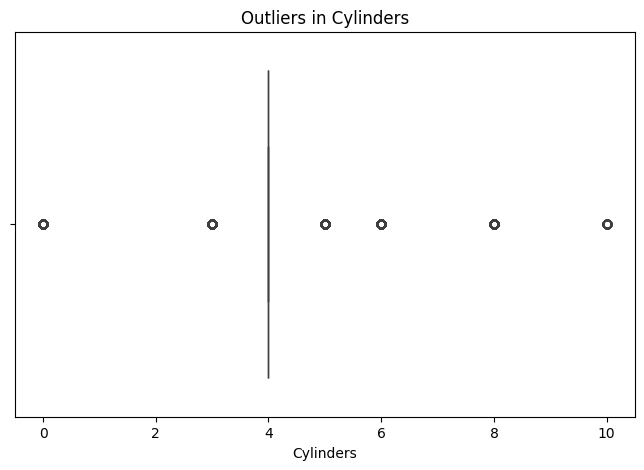

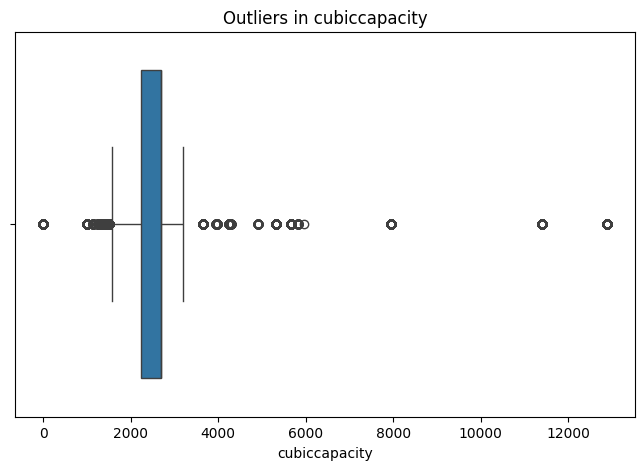

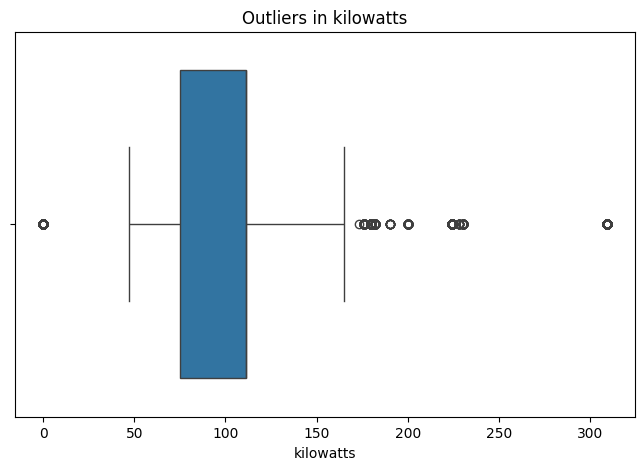

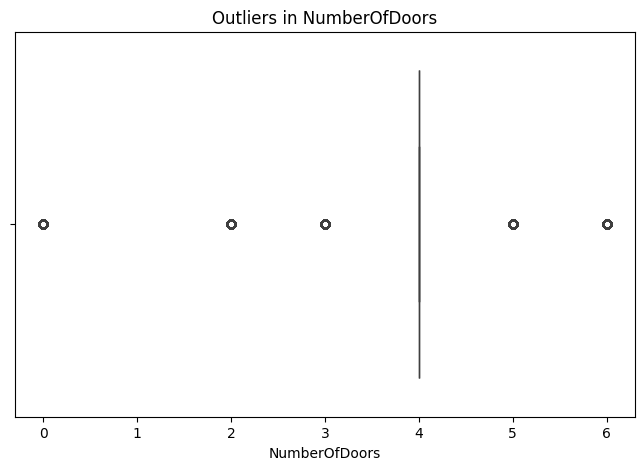

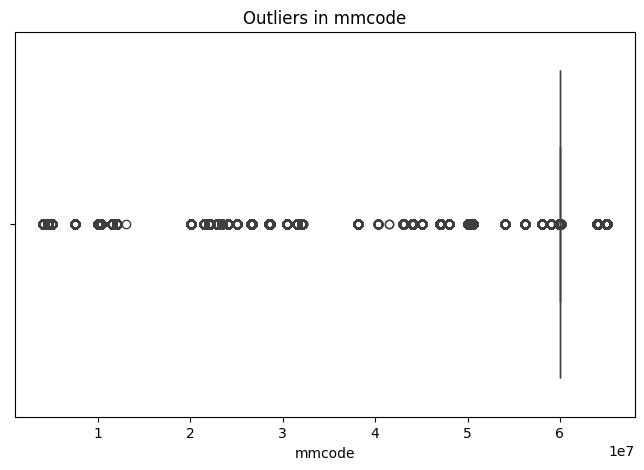

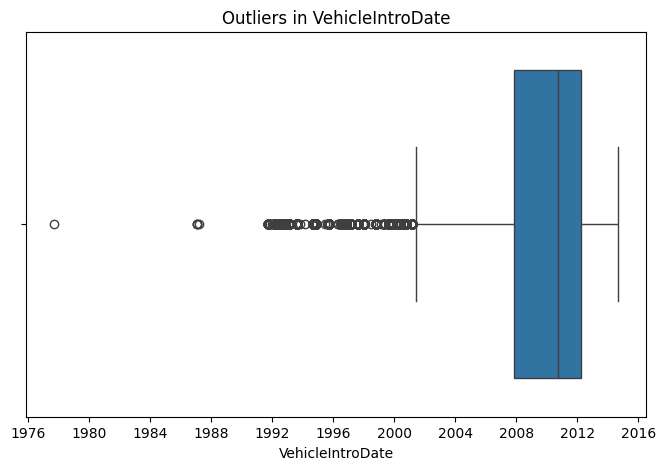

In [15]:
# Detect Outliers
detect_outliers(df, numerical_columns)

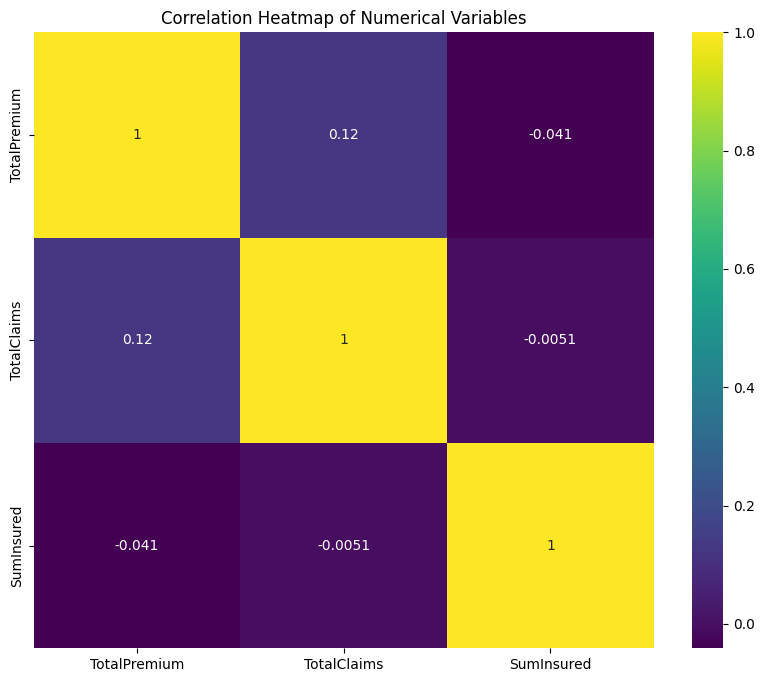

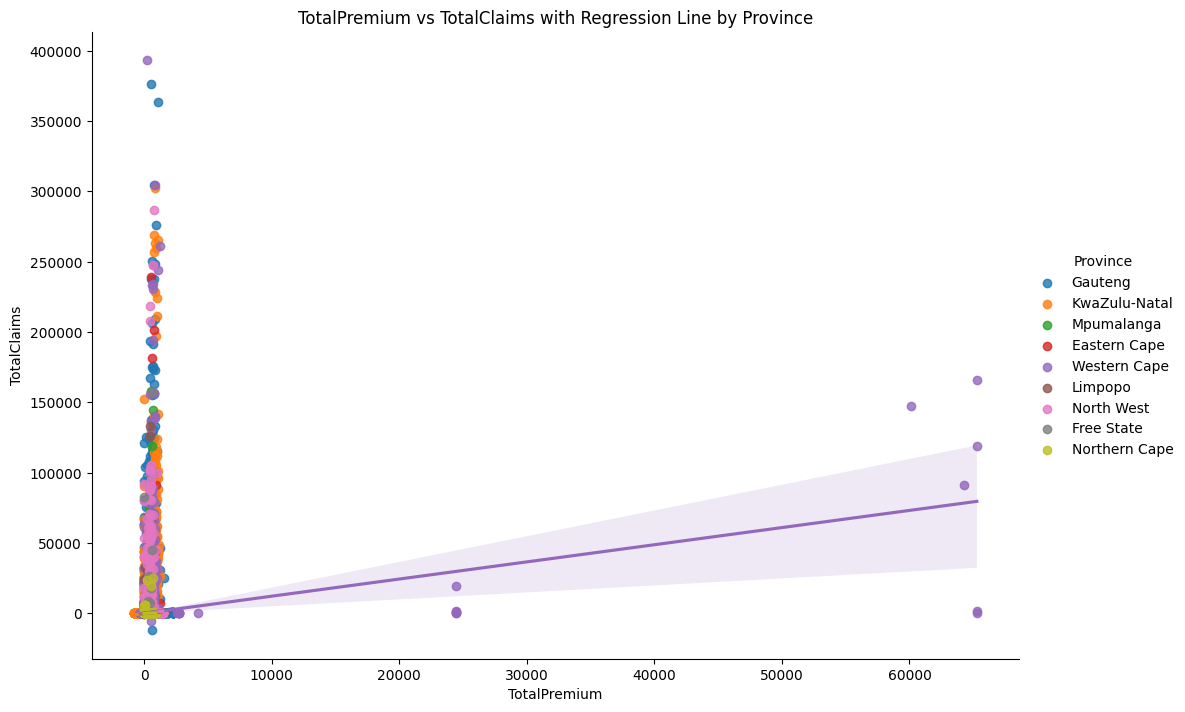

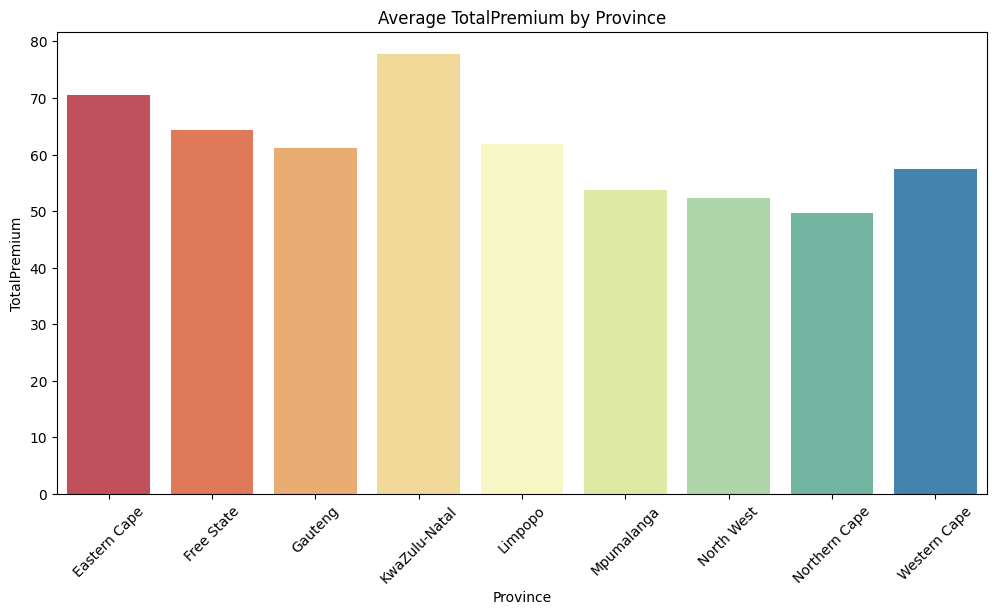

In [16]:
# Create Visualizations
create_visualizations(df)


## key Insights from the above uni-varient analysis
**Percentage of CustomValueEstimate less than 1 million: 99.99%**

**Percentage of Cylinders between 4 and 5: 98.67%**

**Percentage of kilowatts between 50-90: 39.71%**

**Percentage of kilowatts between 100-150: 59.33%**

**Percentage of vehicles with 4 and 5 doors: 96.99%**

**Percentage of First National Bank with more than 4 million: 4.17%**

**Percentage of Current account type: 63.81%**

**Percentage of Savings account type: 35.82%**

**Percentage of not specified gender: 95.04%**

**Percentage of not cross border: 100.00%**

**Percentage of passenger vehicle: 93.41%**

**Percentage of vehicles more than 6 months: 99.84%**

**Percentage of no written off: 100.00%**

**Percentage of no rebuilt: 100.00%**

**Percentage of no converted: 99.99%**

**Percentage of make Toyota: 81.38%**

**Percentage of body type B/S: 84.49%**

**Correlation between totalClaims and sumInsured is 0.12**

### All provinces except around Guating Province has greater totalPremium than totalClaim 


## Hypothesis Testing

In [17]:
df['Province'].value_counts()

Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64

In [18]:
print(f"{(df[df['Province']=='Gauteng'].shape[0]*100/df.shape[0]):.2f}% of the data is from Gauteng")


39.38% of the data is from Gauteng


In [19]:

from scripts.hypothesisTesting import  *

ab_hypothesis_testing(df, group_col="Province", value1="Gauteng", value2="Western Cape", metric_col="TotalPremium", test_type="t-test")


Test Results for TotalPremium:
P-value: 0.0007
Conclusion: Reject the null hypothesis (statistically significant).


np.float64(0.0006960468276141003)

In [ ]:
df['RiskScore'] = df['TotalClaims'] / df['TotalPremium']
df['ProfitMargin'] = df['TotalPremium'] - df['TotalClaims']

# Null Hypothesis 1: Risk differences across provinces
p_value_province = ab_hypothesis_testing(df, group_col="Province", value1="Gauteng", value2="Western Cape", metric_col="RiskScore", test_type="t-test")
print("Risk differences across provinces:", "Reject" if p_value_province is not None and p_value_province < 0.05 else "Fail to Reject", f"(p = {p_value_province:.4f})" if p_value_province is not None else "(p = None)")


Test Results for RiskScore between Gauteng and Western Cape:
P-value: 0.0589
Conclusion: Fail to reject the null hypothesis (not statistically significant).
Risk differences across provinces: Fail to Reject (p = None)


In [ ]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')

In [31]:
# Check unique zip codes in the dataset
print(df['PostalCode'].unique())



[1459 1513 1619 1625 1629 1852 1982 2007 2066 4093 2000 1577 1610 2410
 6200  122 1520 1709 1739 4000 4066 4091 4342 4359 7784  970 6213 6390
 1868 4310  299  309  152  181 1821 4449 4037  139 4074 1057 7100 9725
 1863 1875 2001 2091 3170 3950 1021 2380  300  302  458 7750  157 4811
 4930 5000 5090 5160 5219 5410 5920 6025 6139 5040 6201 6212 6231 9744
    1    8   64   84  162  164 8000  182  183  186  190 5326  192  194
  199  200  201  208  258  264 1431 1441 1455 1494 1496  284 9762 1507
 1540 1559 1571 1724 1754 1757 1759 1779 1803 1804 1806 1809 1818 1828
 1830 1862 1864 1865 1984 2014 2019 2021 2040 2090 2188 2198 3180 3200
 3245 3310 3380 3609 3610 3612 3613 3370 3600 3629 3630 3650 3780 3900
 3934 3973 5143 3880 3882 3915 4001 4004 4011 4023 4027 4051 4052 4053
 4056 4057 4059 4060 4061 4063 4071 4089 4092 4105 4110 4111 4126 4137
 4140 4180 4200 4240 4260 4309 4340 4360 4450 4700  530  555  556  607
  699  738  827 1022 1123 1133 2375 2415 2499 4068 2951 2952 3602 4182
 4490 

In [32]:
print(df['TotalPremium'].isnull().sum())


0


In [22]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')

In [27]:
# Define groups based on PostalCode
group_a_zip = df[df['PostalCode'] == '1234']  # Data for zip code '1234'
group_b_zip = df[df['PostalCode'] == '5678']  # Data for zip code '5678'

# Perform the Mann-Whitney U test on the TotalPremium column
p_value_zip_risk = mannwhitney_test(group_a_zip, group_b_zip, 'TotalPremium')

# Interpret the result
print(f"P-value for TotalPremium between zip codes 1234 and 5678: {p_value_zip_risk}")


P-value for TotalPremium between zip codes 1234 and 5678: nan
